### Introdução sobre o Projeto

##### Etapa 1. Pré-Processamento dos Dados

In [2]:
#importando bibliotecas

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [3]:
#evitar avisos do seaborn

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [4]:
#lendo o arquivo excel

df_1 = pd.read_excel(r'C:\Users\cesar\Downloads\ifoodtech_moduloV\projeto\Clean_Ads_Data.xlsx')

In [5]:
#visualizando as três primeiras linhas

df_1.head(3)

,Timestamp,Date,Hour of Day,Date.1,InventoryType,AD Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,2014-09-01-23,2014-09-01,23,Monday,Format1,300x250,Inter228,Video,Mobile,Video,1911,336,334,0,0.0,0.35,0.0,0.0,0.0,0.0
1,2014-09-01-18,2014-09-01,18,Monday,Format7,300x600,Inter218,App,Mobile,Display,1987,325,324,0,0.0,0.35,0.0,0.0,0.0,0.0
2,2014-09-01-17,2014-09-01,17,Monday,Format7,300x600,Inter222,Video,Desktop,Display,2375,434,428,0,0.0,0.35,0.0,0.0,0.0,0.0


In [7]:
df_1.describe(exclude='number')

,Timestamp,Date,Date.1,InventoryType,AD Size,Ad Type,Platform,Device Type,Format
count,25858,25858,25858,25858,25857,25858,25858,25858,25858
unique,2018,NaN,7,7,7,14,3,2,2
top,2014-10-13-16,NaN,Monday,Format4,120x600,Inter217,Video,Mobile,Video
freq,13,NaN,3733,7218,7218,1850,11077,16621,12929
mean,NaN,2014-10-13 12:39:28.999922688,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,2014-09-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2014-09-23 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,2014-10-14 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2014-11-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,2014-11-24 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#visualizando as principais info do dataframe

df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25858 entries, 0 to 25857
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Timestamp              25858 non-null  object        
 1   Date                   25858 non-null  datetime64[ns]
 2   Hour of Day            25858 non-null  int64         
 3   Date.1                 25858 non-null  object        
 4   InventoryType          25858 non-null  object        
 5   AD Size                25857 non-null  object        
 6   Ad Type                25858 non-null  object        
 7   Platform               25858 non-null  object        
 8   Device Type            25858 non-null  object        
 9   Format                 25858 non-null  object        
 10  Available_Impressions  25858 non-null  int64         
 11  Matched_Queries        25858 non-null  int64         
 12  Impressions            25858 non-null  int64         
 13  C

In [ ]:
#principais estatísticas do dataframe

df_1.describe()

,Date,Hour of Day,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
count,25858,25858.000000,2.585800e+04,2.585800e+04,2.585800e+04,25858.000000,25858.000000,25858.000000,25858.000000,25858.000000,25858.000000,25858.000000
mean,2014-10-13 12:39:28.999922688,11.560407,2.170312e+06,1.155718e+06,1.107910e+06,9526.391252,2415.146152,0.336725,1717.072689,0.075019,7.524461,0.300359
min,2014-09-01 00:00:00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.210000,0.000000,0.000000,0.000000,0.000000
25%,2014-09-23 00:00:00,6.000000,9.133500e+03,5.451500e+03,2.559000e+03,305.000000,36.030000,0.350000,23.419500,0.002343,1.573372,0.078004
50%,2014-10-14 00:00:00,12.000000,3.310695e+05,1.895120e+05,1.621955e+05,3457.000000,1173.745000,0.350000,762.934250,0.007177,2.959644,0.118332
75%,2014-11-03 00:00:00,18.000000,2.208674e+06,1.008255e+06,9.499750e+05,10685.500000,2692.745000,0.350000,1750.284250,0.130617,12.448876,0.499956
max,2014-11-24 00:00:00,23.000000,2.759286e+07,1.470202e+07,1.419477e+07,143049.000000,26931.870000,0.350000,21276.177300,2.000000,715.000000,7.264000
std,NaN,6.915733,4.543952e+06,2.408041e+06,2.327426e+06,16721.563722,3934.248083,0.030546,2994.152333,0.091288,8.928088,0.338831


In [ ]:
#função para visualizar os valores únicos e nulos por colunas

def valores_unicos(df):
    for coluna in df.columns:
        print(f'Coluna {coluna}:')
        
        contar_valores = df[coluna].value_counts()
        porcentagem_valores = df[coluna].value_counts(normalize=True) * 100
        resultado_valores = pd.concat([contar_valores, porcentagem_valores], axis=1, 
                                     keys=['Qnt', 'Porcentagem']).round(2)
        print(resultado_valores)

        print(f'Valores nulos: {df[coluna].isnull().sum()}')
        print('\n')

#visualizando os valores 
valores_unicos(df_1)

Coluna Timestamp:
               Qnt  Porcentagem
Timestamp                      
2014-10-13-16   13         0.05
2014-10-28-23   13         0.05
2014-10-27-07   13         0.05
2014-10-27-01   13         0.05
2014-10-27-14   13         0.05
...            ...          ...
2014-09-04-01   11         0.04
2014-09-01-18   11         0.04
2014-09-04-22   11         0.04
2014-09-04-02   11         0.04
2014-09-01-16    9         0.03

[2018 rows x 2 columns]
Valores nulos: 0


Coluna Date:
            Qnt  Porcentagem
Date                        
2014-10-19  312         1.21
2014-11-20  312         1.21
2014-11-19  312         1.21
2014-11-18  312         1.21
2014-11-17  312         1.21
...         ...          ...
2014-09-04  278         1.08
2014-09-03  278         1.08
2014-09-02  274         1.06
2014-11-24  247         0.96
2014-09-01   90         0.35

[85 rows x 2 columns]
Valores nulos: 0


Coluna Hour of Day:
              Qnt  Porcentagem
Hour of Day                   
17      

In [ ]:
#removendo a única linha que possui valor nulo no data set

df_1 = df_1.dropna(subset=['AD Size'])

In [ ]:
#verificando se há linhas duplicadas 

df_1.duplicated().sum()

0

In [ ]:
#visualizando as colunas Date e Timestamp

print(df_1['Timestamp'].head())
print(df_1['Date'].head())
print(df_1['Hour of Day'].head())


0    2014-09-01-23
1    2014-09-01-18
2    2014-09-01-17
3    2014-09-01-20
4    2014-09-01-22
Name: Timestamp, dtype: object
0   2014-09-01
1   2014-09-01
2   2014-09-01
3   2014-09-01
4   2014-09-01
Name: Date, dtype: datetime64[ns]
0    23
1    18
2    17
3    20
4    22
Name: Hour of Day, dtype: int64


In [ ]:
#excluindo a coluna Timestamp

df_1 = df_1.drop(columns=['Timestamp'])

#criando uma coluna para mês

df_1['Month'] = df_1['Date'].dt.month


#visualizando as três primeiras linhas 

df_1.head(3)

,Date,Hour of Day,Date.1,InventoryType,AD Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,Month
0,2014-09-01,23,Monday,Format1,300x250,Inter228,Video,Mobile,Video,1911,336,334,0,0.0,0.35,0.0,0.0,0.0,0.0,9
1,2014-09-01,18,Monday,Format7,300x600,Inter218,App,Mobile,Display,1987,325,324,0,0.0,0.35,0.0,0.0,0.0,0.0,9
2,2014-09-01,17,Monday,Format7,300x600,Inter222,Video,Desktop,Display,2375,434,428,0,0.0,0.35,0.0,0.0,0.0,0.0,9


In [ ]:
#substituir espaços e pontos por _ nos nomes das colunas

df_1.columns = df_1.columns.str.replace(' ', '_').str.replace('.', '_' )

#renomeando a coluna InventoryType

df_1.rename(columns={'InventoryType': 'Inventory_Type'}, inplace=True)

#visualizando as três primeiras linhas 

df_1.head(3)

,Date,Hour_of_Day,Date_1,Inventory_Type,AD_Size,Ad_Type,Platform,Device_Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,Month
0,2014-09-01,23,Monday,Format1,300x250,Inter228,Video,Mobile,Video,1911,336,334,0,0.0,0.35,0.0,0.0,0.0,0.0,9
1,2014-09-01,18,Monday,Format7,300x600,Inter218,App,Mobile,Display,1987,325,324,0,0.0,0.35,0.0,0.0,0.0,0.0,9
2,2014-09-01,17,Monday,Format7,300x600,Inter222,Video,Desktop,Display,2375,434,428,0,0.0,0.35,0.0,0.0,0.0,0.0,9


In [ ]:
#criar vetor para definir tipo das colunas (FALTA)

pd.to_numeric(s, errors='coerce')

In [ ]:
#criando uma cópia do dataset após as etapas acima

df_2 = df_1.copy()

##### 2. Identificação e Tratamento de Outliers

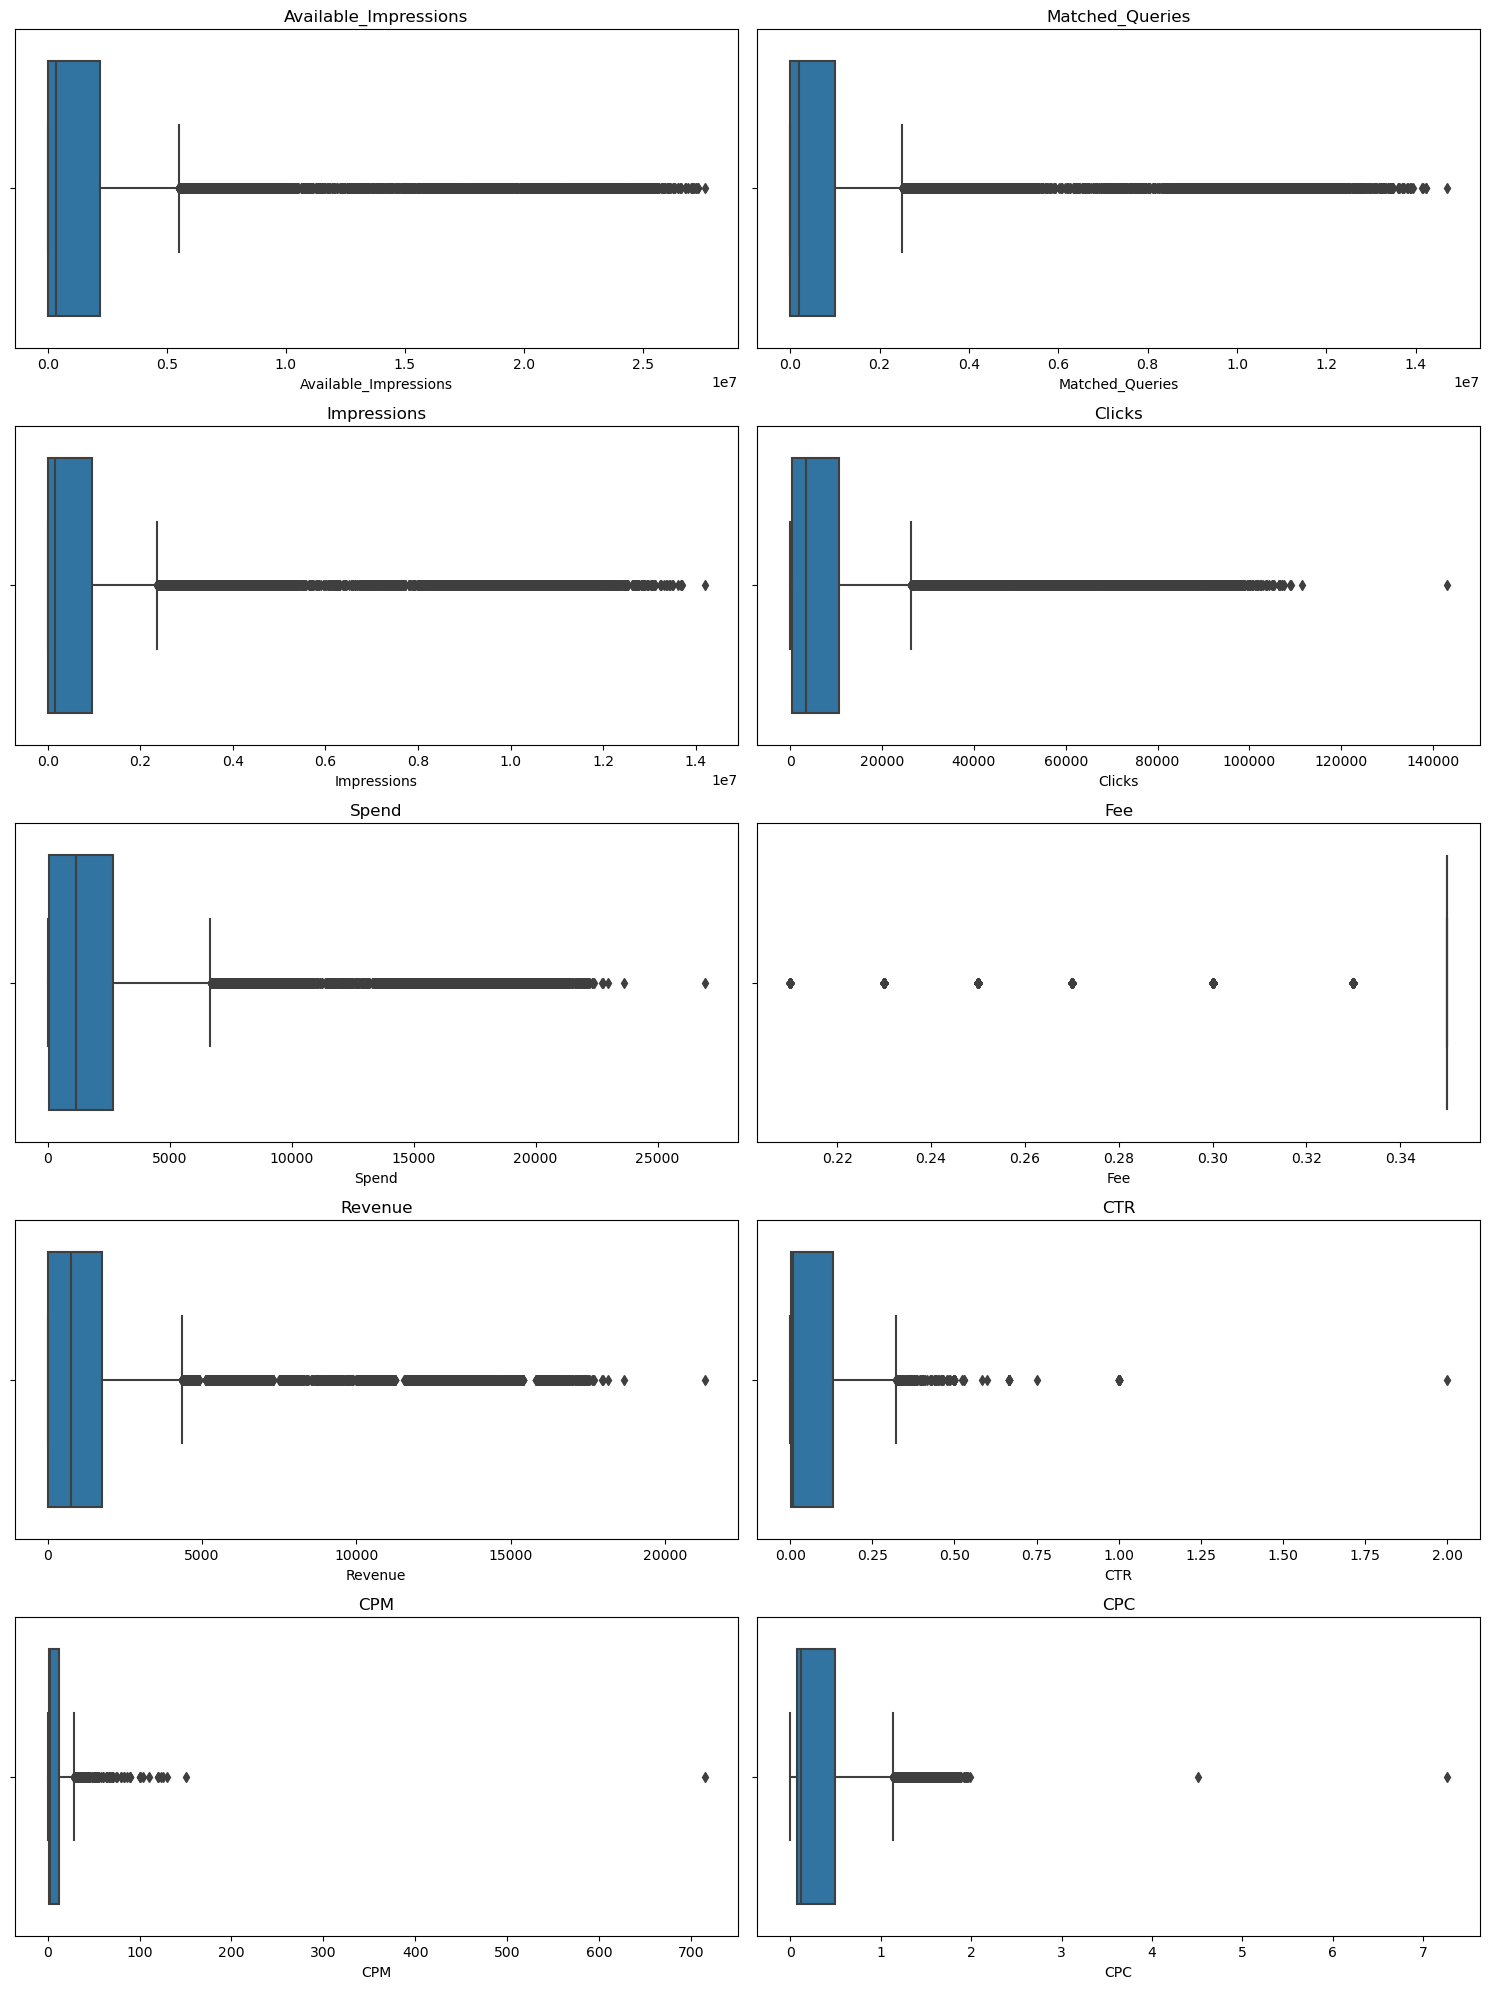

In [ ]:
#visualizando distribuição das variáveis númericas

colunas_numericas = ['Available_Impressions', 'Matched_Queries', 'Impressions', 'Clicks', ' ',
                      'Fee', 'Revenue', 'CTR', 'CPM', 'CPC']

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
for n, variaveis in enumerate(colunas_numericas):
    sns.boxplot(x=df_1[variaveis], ax=axes[n//2, n%2])
    axes[n//2, n%2].set_title(variaveis)

plt.tight_layout()
plt.show()